<a href="https://colab.research.google.com/github/ykkim77/nlp_10th_week/blob/main/nlp_10th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from tensorflow.keras.datasets import imdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Conv1D, Dense, Embedding, MaxPool1D, Flatten
from tensorflow.keras.models import Model

In [34]:
(x_train,y_train), (x_test,y_test) = imdb.load_data(num_words = 1000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [35]:
x_train.shape
#0th sentence
print(x_train[0])
print(len(x_train[0]))

#1th sentence
print(len(x_train[1]))

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218
189


In [36]:
word_to_index = imdb.get_word_index()
word_to_index = {key:(value+3) for key,value in word_to_index.items()}
word_to_index["<PAD>"] = 0
word_to_index["<START>"] = 1
word_to_index["<UNK>"] = 2
word_to_index["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_index.items()}
print(' '.join(id_to_word[id] for id in x_train[0] ))

<START> this film was just brilliant casting <UNK> <UNK> story direction <UNK> really <UNK> the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same <UNK> <UNK> as myself so i loved the fact there was a real <UNK> with this film the <UNK> <UNK> throughout the film were great it was just brilliant so much that i <UNK> the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the <UNK> <UNK> was amazing really <UNK> at the end it was so sad and you know what they say if you <UNK> at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of <UNK> and paul they were just brilliant children are often left out of the <UNK> <UNK> i think because the stars that play them all <UNK> up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they have done don't yo

In [37]:
imdb_index = imdb.get_word_index(path= 'imdb_word_index.json')
imdb_index = {k:(v+3) for k,v in imdb_index.items()}
imdb_index["<pad>"]= 0
imdb_index["<start>"]= 1
imdb_index["<unk>"]= 2
imdb_index["<unused>"]= 3

In [38]:
imdb_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [39]:
imdb_num2vec = {value:key for key,value in imdb_index.items()}

In [40]:
sent = [imdb_num2vec[index] for index in x_train[0]]

In [41]:
" ".join(sent)

"<start> this film was just brilliant casting <unk> <unk> story direction <unk> really <unk> the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same <unk> <unk> as myself so i loved the fact there was a real <unk> with this film the <unk> <unk> throughout the film were great it was just brilliant so much that i <unk> the film as soon as it was released for <unk> and would recommend it to everyone to watch and the <unk> <unk> was amazing really <unk> at the end it was so sad and you know what they say if you <unk> at a film it must have been good and this definitely was also <unk> to the two little <unk> that played the <unk> of <unk> and paul they were just brilliant children are often left out of the <unk> <unk> i think because the stars that play them all <unk> up are such a big <unk> for the whole film but these children are amazing and should be <unk> for what they have done don't y

In [42]:
# pos / neg 개 수 얻기

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

1    12500
0    12500
dtype: int64
1    12500
0    12500
dtype: int64


In [43]:
# 문장 하나당 단어가 얼마나 들어 있는지 확인

x_train_lengths = pd.DataFrame(x_train).applymap(len)
index, counts = np.unique(x_train_lengths, return_counts=True)

2494 11
196 1


,0
count,25000.000000
mean,238.713640
std,176.497204
min,11.000000
25%,130.000000
50%,178.000000
75%,291.000000
max,2494.000000


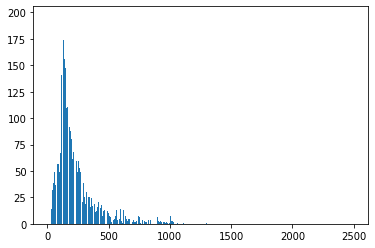

In [44]:
plt.bar(index,counts)
print(max(index), min(index))
print(max(counts), min(counts))
x_train_lengths.describe()

In [45]:
x_test_lengths = pd.DataFrame(x_test).applymap(len)
index, counts = np.unique(x_test_lengths, return_counts=True)

2315 7
184 1


,0
count,25000.000000
mean,230.804200
std,169.164471
min,7.000000
25%,128.000000
50%,174.000000
75%,280.000000
max,2315.000000


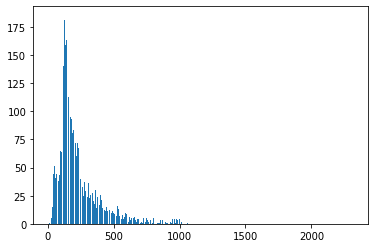

In [46]:
plt.bar(index,counts)
print(max(index), min(index))
print(max(counts), min(counts))
x_test_lengths.describe()

**Data Embedding**

In [47]:
max_len = x_train_lengths.max().values
xtrain_padded = pad_sequences(x_train, maxlen= 300, padding= 'post')
xtest_padded = pad_sequences(x_test, maxlen= 300, padding= 'post')

In [48]:

max(np.max(x_train, axis=None))

998

In [80]:
#input

input = Input(shape=(300))

#embedding layer
layer = Embedding(input_dim= 1000, output_dim= 100)(input)

#Block 1

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = MaxPool1D()(layer)

#Block 2

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = MaxPool1D()(layer)

#Block 3

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = Conv1D(filters= 64, kernel_size=5, activation= 'relu', kernel_initializer='he_normal')(layer)

layer = MaxPool1D()(layer)

layer = Flatten()(layer)
layer = Dense(15,activation='tanh',kernel_initializer='he_normal')(layer)
layer = Dense(15,activation='tanh',kernel_initializer='he_normal')(layer)
layer = Dense(1,activation='sigmoid')(layer)

output = layer



In [81]:
model = Model(input,output)
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 300)]             0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 300, 100)          100000    
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 296, 64)           32064     
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 292, 64)           20544     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 146, 64)           0         
_________________________________________________________________
conv1d_68 (Conv1D)           (None, 142, 64)           20544     
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 138, 64)           205

In [82]:
model.compile('adam','binary_crossentropy', metrics=['acc'])

**epochs 을 너무 많이 주지 말고, 20 정도만 사용할 것을 권장합니다. (수행 속도가 너무 길어짐)**

In [84]:
model.fit(xtrain_padded,y_train, epochs=1, validation_data=(xtest_padded,y_test))

782/782 [==============================] - 135s 172ms/step - loss: 0.4993 - acc: 0.7235 - val_loss: 0.3335 - val_acc: 0.8582
